# Geometric Transformations

## Sample Images

`sklearn.datasets.load_sample_images()` is a function available in scikit-learn, a widely used Python machine learning library {cite:p}`sklearnUserGuide`. Detailed information about this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html). This function is used to load a collection of sample images, which can be useful for testing and experimenting with image-based machine learning algorithms and data analysis pipelines.

When you call `load_sample_images()`, it retrieves a predefined set of sample images that are bundled with the scikit-learn library. These images cover a range of subjects and formats, providing a diverse set of data for practicing and developing image processing, computer vision, and machine learning techniques.

The loaded images are usually provided as a dictionary-like object, containing the images themselves, information about the images, and sometimes additional metadata. This allows you to quickly access and work with the sample images for various tasks.
If you're interested, you can access the detailed documentation for this image dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images).

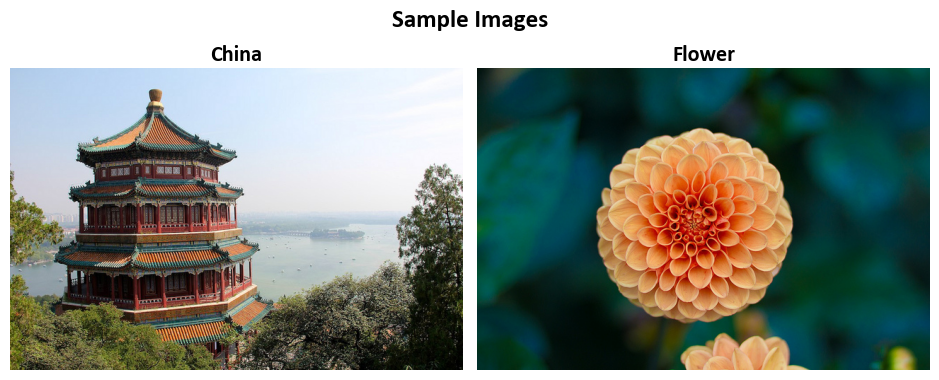

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False, figsize=(9.5, 4)):
    '''
    Display a pair of images side by side.

    Parameters:
    Images (list): List of two images to be displayed.
    Names (list): List of two names or labels for the images.
    title (str, optional): Title for the figure. Defaults to 'Images'.
    grayscale (bool, optional): If True, display images in grayscale. Defaults to False.
    figsize (tuple, optional): Figure size (width, height) in inches. Defaults to (9.5, 4).

    Returns:
    matplotlib.figure.Figure: The figure containing the displayed images.
    numpy.ndarray: The array of subplots for further manipulation.
    '''
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=figsize)  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

# Load sample images
from sklearn.datasets import load_sample_images  # Import a function to load sample images

Images = load_sample_images()['images']  # Load the sample images
# Extract image names from file paths, removing extension and converting to title case
Names = [x.split("/")[-1].replace('.jpg', '').title() for x in load_sample_images()['filenames']]

# Display the original images
_, _ = ImShow(Images, Names, title='Sample Images')  # Call the ImShow function to display images

## Affine Transformations

An affine transformation is a fundamental concept in image processing used to represent various geometric operations. It combines linear transformations (matrix multiplication) with translations (vector addition) to achieve versatile effects {cite:p}`OpenCVDocumentation`:

1. **Rotations**: Employing linear transformations to rotate the image.
2. **Translations**: Achieved by adding a vector, effectively shifting the image.
3. **Scale Operations**: Applying linear transformations to resize the image.

At its core, an affine transformation describes the relationship between two images. This transformation is typically represented by a 2x3 matrix {cite:p}`OpenCVDocumentation`:

\begin{equation}
A = \begin{bmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1}
\end{equation}

We combine these matrices to form a 2x3 matrix:

\begin{equation}
M = \begin{bmatrix} A & B \end{bmatrix} = \begin{bmatrix} a_{00} & a_{01} & b_{00} \\ a_{10} & a_{11} & b_{10} \end{bmatrix}_{2 \times 3}
\end{equation}

To transform a 2D vector $X = \begin{bmatrix} x \\ y \end{bmatrix}$ using A and B, we can use:

\begin{equation}
T = A \cdot X + B
\end{equation}

This results in:

\begin{equation}
T = \begin{bmatrix} a_{00}x + a_{01}y + b_{00} \\ a_{10}x + a_{11}y + b_{10} \end{bmatrix}
\end{equation}

The aforementioned transformation may be alternatively expressed as follows. Given an input 2D vector $\mathbf{X} = \begin{bmatrix} x \\ y \end{bmatrix}$, the [transformation](https://hatefdastour.github.io/notes/Linear_Algebra/chapter_05/Linear_Transformations.html) $T$ can be succinctly defined as:

\begin{equation}
\begin{bmatrix}x' \\ y' \end{bmatrix}= M \mathbf{X^*}
= \begin{bmatrix} a_{00}x + a_{01}y + b_{00} \\ a_{10}x + a_{11}y + b_{10} \end{bmatrix}
\end{equation} 

Where:

- $M$ denotes the 2x3 matrix:

\begin{equation}
M = \begin{bmatrix} A & B \end{bmatrix} = \begin{bmatrix} a_{00} & a_{01} & b_{00} \\ a_{10} & a_{11} & b_{10} \end{bmatrix}_{2 \times 3}
\end{equation}

- $\mathbf{X}$ represents the input vector:

\begin{equation} \mathbf{X} = \begin{bmatrix} x \\y \end{bmatrix}
\end{equation}

- $\mathbf{X^*}$ signifies an augmented form of the input vector:

\begin{equation} \mathbf{X} = \begin{bmatrix} x \\y \\ 1 \end{bmatrix}
\end{equation}
- $x'$ and $y'$ denote the transformed coordinates, which are the outcomes of applying the affine transformation $T$ to the input vector $\mathbf{X}$.

Affine transformations provide a powerful framework for image manipulation, enabling operations such as rotation, translation, scaling, and more. They form the basis for transforming images efficiently and systematically.


* **Translation Transformations:**

\begin{equation}
A = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1}
\end{equation}


* **Rotation Transformations (for positive angles being clockwise rotations:)**

\begin{equation}
A = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} 0 \\ 0 \end{bmatrix}_{2 \times 1}
\end{equation}

* **Scaling Transformations:**
\begin{equation}
A = \begin{bmatrix} a_{00} & 0 \\ 0 & a_{11} \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1}
\end{equation}

### How to Derive an Affine Transformation?

An Affine Transformation represents a fundamental relationship between two images. This connection can be established through different means, generally falling into two categories [OpenCV Developers, 2023]:

1. **When We Know Both $X$ and $T$**: In this scenario, we possess knowledge about both sets of points, X and T, and we are aware that these points are related. Our objective is to find the transformation matrix, denoted as $M$.

2. **When We Know $X$ and $M$**: If we have information about the transformation matrix $M$ and the original set of points $X$, we can easily obtain the transformed set of points $T$ by applying the transformation equation $T = MX$. This information for $M$ can either be explicit, represented as a 2-by-3 matrix, or it may be inferred from a geometric relationship between points.

To elucidate the concept further, let's delve into the scenario described in point (b). When $M$ is the relationship that connects two images, we can analyze the simplest case where $M$ relates three distinct points in both images. Consider the visual representation below {cite:p}`OpenCVDocumentation`:

```{figure} Warp_Affine_0.png
---
width: 400px
align: center
---
Image courtesy of {cite:p}`OpenCVDocumentation`.
```

In the image, points 1, 2, and 3 form a triangle in image 1. This same triangle, when mapped into image 2 through the Affine Transformation, undergoes a noticeable change. By determining the Affine Transformation using these three chosen points (which can be selected as needed), we can establish this discovered relationship for all pixels within an image.

This methodology empowers us to apply the same transformation across the entire image, enabling geometric alterations such as rotations, translations, and scaling. Understanding this relationship between points and the transformation matrix forms the foundation for systematically manipulating images with Affine Transformations.

### getAffineTransform

The function `cv2.getAffineTransform(src, dst)` is a part of the OpenCV library in Python, and it's used to calculate the Affine Transformation matrix that maps points from one plane (source, `src`) to another plane (destination, `dst`). The Affine Transformation is a linear transformation that involves rotation, translation, and scaling. This transformation matrix can then be used to warp or transform images, shapes, or sets of points from the source plane to the destination plane {cite:p}`opencv_library, OpenCVDocumentation`.

Here's a breakdown of the function parameters and return value:

1. `src`: The source points, which is a 3x2 array of floating-point coordinates representing the original points in the source plane. It should contain three points (rows), each with two coordinates (columns).

2. `dst`: The destination points, which is also a 3x2 array of floating-point coordinates. These represent the corresponding points in the destination plane. Just like the source points, it should contain three points with two coordinates each.

The function calculates the Affine Transformation matrix that best maps the source points to the destination points. This matrix is denoted by the return value `retval`, which is a 2x3 floating-point matrix representing the transformation. The `retval` matrix can be used for various purposes, such as warping images using `cv2.warpAffine()` or transforming sets of points.

To use the Affine Transformation matrix obtained from `cv2.getAffineTransform()`, you'll typically apply it to an image or points using the `cv2.warpAffine()` function, which performs the actual transformation. This function uses the calculated matrix to apply the transformation to the image or points. You can find the full description of this function [here](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html).

### Image Wrap

The function you're referring to, `cv2.warpAffine()`, is part of the OpenCV library, which is a popular computer vision and image processing library in Python. This specific function is used for geometric image transformations, particularly affine transformations. Let's break down the parameters and its purpose:

```
cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
```

Here's what each parameter does:

1. `src`: This is the input image, which is the source image you want to apply the transformation to. It should be a NumPy array (image) in most cases.

2. `M`: This parameter represents the transformation matrix. It's a 2x3 matrix that defines the affine transformation. The matrix includes parameters like scaling, rotation, translation, and shearing. The transformation matrix `M` is used to specify how each pixel in the source image should be mapped to the destination image.

3. `dsize`: This is the size (width and height) of the output image (destination image) you want to create after applying the transformation. It's specified as a tuple (width, height).

4. `dst` (optional): This is the output image where the transformed image will be stored. If not provided, a new image will be created to store the result.

5. `flags` (optional): This parameter specifies the interpolation method to be used during the transformation. Different methods can be used to determine the pixel values of the output image at locations that do not exactly map to locations in the source image.

6. `borderMode` (optional): This parameter determines how to handle pixels that fall outside the boundaries of the source image. It defines the border mode.

7. `borderValue` (optional): When a pixel is outside the source image boundaries, this parameter specifies the value that should be used for the pixel.

8. `-> dst`: This indicates that the function returns the destination image, which contains the result of the affine transformation.

You can find the full description of this function [here](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html).

<font color='Blue'><b>Example</b></font>: 
In this illustrative code snippet, we showcase Affine Image Transformation using `cv2.getAffineTransform` in Python, including the definition of source and destination points, calculation of the Affine Transformation matrix, and visualization of the original and transformed images. We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

Affine Transformation Matrix (M) = [[  1.27   0.6  -83.33]
 [ -0.33   1.    66.67]]


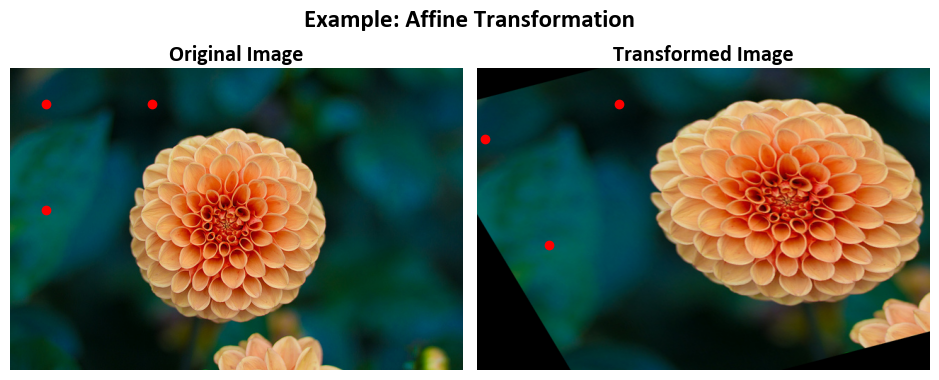

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('flower.jpg')
rows, cols, _ = Img.shape

# Define the source points (original triangle)
src_pts = np.float32([[50, 50],
                      [200, 50],
                      [50, 200]])

# Define the destination points (how the triangle should be transformed)
dst_pts = np.float32([[10, 100],
                      [200, 50],
                      [100, 250]])

# Calculate the Affine Transformation matrix using cv2.getAffineTransform
M = cv2.getAffineTransform(src_pts, dst_pts).round(2)
print('Affine Transformation Matrix (M) =', M)

# Apply the Affine Transformation to the image
Out = cv2.warpAffine(Img, M, (cols, rows))

# Display the original and transformed images with titles
fig, ax = ImShow(Images=[Img, Out],
                 Names=['Original Image', 'Transformed Image'],
                 title='Example: Affine Transformation', grayscale=False)

# Mark the source and destination points on the images
_ = ax[0].scatter(src_pts[:, 0], src_pts[:, 1], color='red')  # Mark source points on the original image
_ = ax[1].scatter(dst_pts[:, 0], dst_pts[:, 1], color='red')  # Mark destination points on the transformed image

Given an input 2D vector $\mathbf{X} = \begin{bmatrix} x \\ y \end{bmatrix}$, the transformation $T$ can be expressed as:

\begin{equation}\begin{bmatrix}x' \\ y' \end{bmatrix} = M  \mathbf{X^{*}} \end{equation}

Where:

- $M$ is the following 2x3 matrix:

\begin{equation} M = \begin{bmatrix} 1.27 & 0.6 & -83.33 \\ -0.33 & 1.0 & 66.67 \end{bmatrix} \end{equation}

- $\mathbf{X}$ represents the input vector:

\begin{equation} \mathbf{X} = \begin{bmatrix} x \\y \end{bmatrix}
\end{equation}

- $\mathbf{X^*}$ signifies an augmented form of the input vector:

\begin{equation} \mathbf{X} = \begin{bmatrix} x \\y \\ 1 \end{bmatrix}
\end{equation}

- $x'$ and $y'$ are the transformed coordinates, which are the result of applying the affine transformation $T$ to the input vector $\mathbf{X}$.

To calculate $x'$ and $y'$, you perform the matrix multiplication as follows:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
1.27 & 0.6 & -83.33 \\
-0.33 & 1.0 & 66.67
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
\end{equation}

- $[x, y]$ represents a point in the original 2D plane, typically corresponding to a pixel location in the original image.

- $[x', y']$ represents the transformed point in the 2D plane, which corresponds to the new location of the pixel after applying the affine transformation.

$[x, y]$ are the coordinates of a point in the original image, and $[x', y']$ are the coordinates of the corresponding point in the transformed image after the affine transformation has been applied using the matrix $M$.

***

In this code example, we perform the following task(s):

This code snippet demonstrates an Affine Transformation, which is a type of geometric transformation used to map points from one coordinate space to another. In this specific case, it defines a transformation for a triangle and applies it to an image. Here's a breakdown of each part:

1. `src_pts`: These are the source points, representing the vertices of the original triangle in the source coordinate space. The `np.float32` function is used to define these points as a NumPy array of floating-point numbers.

2. `dst_pts`: These are the destination points, indicating how the original triangle should be transformed in the destination coordinate space. The `np.float32` function similarly defines these points as a NumPy array.

3. `cv2.getAffineTransform(src_pts, dst_pts)`: This function, part of the OpenCV library, calculates the Affine Transformation matrix based on the source and destination points. It determines how to transform the source triangle to align with the destination triangle.

4. `M`: The calculated Affine Transformation matrix is stored in the variable `M`. The `.round(2)` method is used to round the matrix elements to two decimal places for clarity.

5. `print('Affine Transformation Matrix (M) =', M)`: This line prints the Affine Transformation matrix `M` to the console for inspection.

6. `Out = cv2.warpAffine(Img, M, (cols, rows))`: This code applies the Affine Transformation to an input image `Img`. It uses the transformation matrix `M` to warp the image. The result is stored in the variable `Out`. The `cols` and `rows` are the dimensions of the output image, typically representing the width and height of the transformed image.

In [3]:
import numpy as np

def Transformation(M, src_pts):
    '''
    Apply a 2D transformation matrix to a set of source points.

    Parameters:
    M (numpy.ndarray): The 2x3 transformation matrix.
    src_pts (numpy.ndarray): An array of source points in the shape (N, 2).

    Returns:
    numpy.ndarray: An array of transformed points in the shape (N, 2).
    '''
    # Reshape src_pts for matrix multiplication
    src_pts_reshaped = src_pts.T

    # Apply the transformation matrix M to the source points
    transformed_pts = M @ np.vstack((src_pts_reshaped, np.ones(src_pts.shape[0])))

    # Transpose the result to obtain a 2x3 matrix
    transformed_pts = transformed_pts.T

    # transformed_pts now contains the transformed points in a 2x3 matrix
    return transformed_pts

Note that if you use the above transfomratio, we get


\begin{align*}
\begin{bmatrix}x' \\y'\end{bmatrix} &=
\begin{bmatrix}1.27 & 0.6 & -83.33 \\-0.33 & 1.0 & 66.67\end{bmatrix}
\begin{bmatrix}50 \\50 \\ 1\end{bmatrix}=
\begin{bmatrix}10 \\100\end{bmatrix}\\
%
\begin{bmatrix}x' \\y'\end{bmatrix} &=
\begin{bmatrix}1.27 & 0.6 & -83.33 \\-0.33 & 1.0 & 66.67\end{bmatrix}
\begin{bmatrix}200 \\50 \\ 1\end{bmatrix}=
\begin{bmatrix}200 \\50\end{bmatrix}\\
%
\begin{bmatrix}x' \\y'\end{bmatrix} &=
\begin{bmatrix}1.27 & 0.6 & -83.33 \\-0.33 & 1.0 & 66.67\end{bmatrix}
\begin{bmatrix}50 \\200\\ 1\end{bmatrix}=
\begin{bmatrix}100 \\250\end{bmatrix}\\
\end{align*}


Please note that all final outputs were rounded to the nearest whole integers.

In [4]:
from pprint import pprint
print('src_pts:')
pprint(src_pts)
print('dst_pts:')
pprint(Transformation(M, src_pts))

src_pts:
array([[ 50.,  50.],
       [200.,  50.],
       [ 50., 200.]], dtype=float32)
dst_pts:
array([[ 10.17, 100.17],
       [200.67,  50.67],
       [100.17, 250.17]])


<font color='Blue'><b>Example</b></font>:
In this example, we demonstrate 2D Image Translation using `cv2.warpAffine` in Python, showcasing the transforming an image of an image using the following $M$:

\begin{equation}
M =
\begin{bmatrix}
1 & 0 & 10 \\
0 & 1 & 20
\end{bmatrix}
\end{equation}
where specified values of $b_{00} = 10$ and $b_{10} = 20$ and displaying both the original and transformed images with informative labels. We utilize the [image dataset function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) from scikit-learn to showcase fundamental image manipulation operations using OpenCV.

Transformation Matrix (M) = [[ 1.  0. 10.]
 [ 0.  1. 20.]]


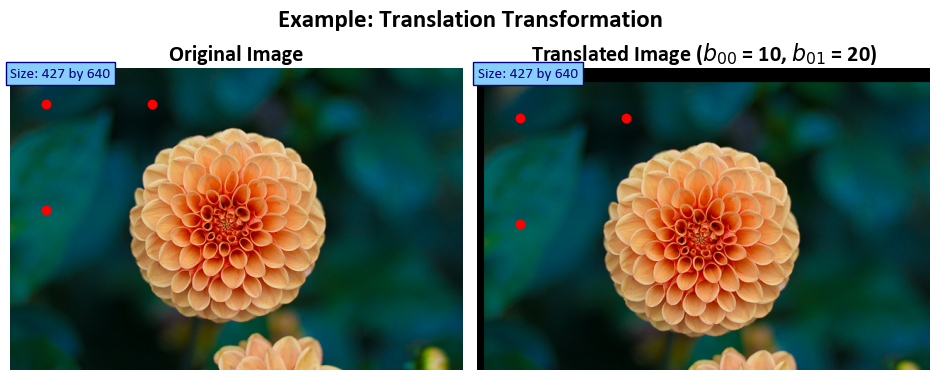

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Load the sample image
Img = load_sample_image('flower.jpg')
rows, cols, _ = Img.shape

# Define a function to create a 2D translation matrix
def map_matrix(tx, ty):
    """
    Create a 2D translation matrix.

    Args:
        tx (float): Translation amount in the x-direction.
        ty (float): Translation amount in the y-direction.

    Returns:
        np.ndarray: A 2x3 transformation matrix for translation.
    """
    # Create a 2x3 transformation matrix with translation values (tx, ty)
    M = np.eye(3, dtype=float)[:2, :]
    M[:, -1] = [tx, ty]
    return M

# Apply the affine transformation to the image using warpAffine
# with translation values tx = 10 and ty = 20
tx = 10
ty = 20
M = map_matrix(tx, ty)
print('Transformation Matrix (M) =', M)
Out = cv2.warpAffine(Img, M, (cols, rows))

# Display the original and transformed images with titles
fig, ax = ImShow([Img, Out], 
                 ['Original Image', 'Translated Image ($b_{00}$ = %i, $b_{01}$ = %i)' % (tx, ty)],
                 title='Example: Translation Transformation')
    
# Define the source points (original triangle)
src_pts = np.float32([[50, 50],
                      [200, 50],
                      [50, 200]])

# Define the destination points (how the triangle should be transformed)
dst_pts = Transformation(M, src_pts)
# Mark the source and destination points on the images
_ = ax[0].scatter(src_pts[:, 0], src_pts[:, 1], color='red')  # Mark source points on the original image
_ = ax[1].scatter(dst_pts[:, 0], dst_pts[:, 1], color='red')  # Mark destination points on the transformed image

# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))


`````{admonition} Note
:class: warning

It is essential to note that in this context, $t_x$ and $t_y$ are equivalent to $b_{00}$ and $b_{10}$ respectively, as represented by:

\begin{equation}
B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1} \text{ and } 
B = \begin{bmatrix} t_{x} \\ t_{y} \end{bmatrix}_{2 \times 1}
\end{equation}

`````

Given an input 2D vector $\mathbf{X} = \begin{bmatrix} x \\ y \end{bmatrix}$, the transformation $T$ can be expressed as:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
M \mathbf{X^*}
\end{equation}

Where:

- $M$ is the 2x3 translation matrix created in the `map_matrix` function:

\begin{equation}
M =
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}
\end{equation}

- $\mathbf{X}$ is the input vector:

\begin{equation}
\mathbf{X} =
\begin{bmatrix}
x \\ y
\end{bmatrix}
\end{equation}

- $\mathbf{X^*}$ signifies an augmented form of the input vector:

\begin{equation} \mathbf{X} = \begin{bmatrix} x \\y \\ 1 \end{bmatrix}
\end{equation}

- $x'$ and $y'$ are the transformed coordinates, which are the result of applying the translation transformation $T$ to the input vector $\mathbf{X}$.

In this specific code:

- $t_x$ and $t_y$ are the translation amounts in the x and y directions, respectively. These values are set to 10 and 20 in the code.
- The `map_matrix` function creates the translation matrix $M$ with the specified translation values $(t_x, t_y)$.
- The `cv2.warpAffine` function applies the translation transformation to the image using the matrix $M$.

The result is a translated image where each pixel has been shifted by $tx$ units in the x-direction and $ty$ units in the y-direction.
***

In this code example, we perform the following task(s):

1. `map_matrix(tx, ty)`: This is a Python function that creates a 2D translation matrix. It accepts two arguments, `tx` for the translation amount in the x-direction and `ty` for the translation amount in the y-direction. The purpose of this function is to generate a transformation matrix for translation.

2. `M = np.eye(3, dtype=float)[:2, :]`: This line creates a 2x3 transformation matrix. It initializes an identity matrix (`np.eye(3, dtype=float)`) and then selects only the first two rows and all columns, effectively creating a 2x3 matrix. The last column of this matrix is used to store the translation values.

3. `M[:, -1] = [tx, ty]`: This assigns the translation values `tx` and `ty` to the last column of the transformation matrix `M`. The translation matrix is now ready to be applied to an image.

4. `tx = 10` and `ty = 20`: These lines set the translation amounts for the transformation.

5. `M = map_matrix(tx, ty)`: This line applies the `map_matrix` function with the translation values `tx` and `ty` and obtains the transformation matrix `M`.

6. `print('Transformation Matrix (M) =', M)`: It prints the resulting transformation matrix `M` to the console.

7. `Out = cv2.warpAffine(Img, M, (cols, rows))`: This code applies the translation transformation to the input image `Img` using the transformation matrix `M`. The result is stored in the variable `Out`. The dimensions `(cols, rows)` specify the size of the output image.

### getRotationMatrix2D

In computer vision and image processing, the `cv2.getRotationMatrix2D` function, provided by the OpenCV library, is a valuable tool for computing a 2D rotation matrix. This matrix facilitates image rotations with precise control over the angle and scaling factor.

The function requires three primary arguments:

1. `center`: This parameter specifies the rotation center, typically represented as a tuple (x, y) denoting the coordinates of the central point around which the image will rotate.

2. `angle`: The rotation angle is defined in degrees. **A positive angle value indicates counterclockwise rotation, while a negative angle value signifies a clockwise rotation**.

3. `scale`: The scaling factor applied to the image after rotation. It allows for resizing the image during the rotation process. A scale of 1 preserves the original size, values greater than 1 increase it, and values less than 1 decrease it.

The function returns a 2x3 transformation matrix commonly referred to as the "rotation matrix." This matrix encapsulates the geometric transformations necessary to achieve the specified rotation and scaling effects.

Mathematically, the rotation matrix is expressed as:

\begin{equation}
\begin{bmatrix}
\alpha & \beta & (1 - \alpha) \cdot \texttt{center.x} - \beta \cdot \texttt{center.y} \\
- \beta & \alpha & \beta \cdot \texttt{center.x} + (1 - \alpha) \cdot \texttt{center.y}
\end{bmatrix}
\end{equation}

Where:
- $\alpha = \texttt{scale} \cdot \cos(\texttt{angle})$
- $\beta = \texttt{scale} \cdot \sin(\texttt{angle})$

This transformation preserves the rotation center at its original position. If the objective is to change the rotation center, you can adjust the shift accordingly.

For a more comprehensive understanding of this function, please refer to [this link](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326).

<font color='Blue'><b>Example:</b></font> In this example, we load an image, rotate it by 25 degrees, and display both the original and rotated images.

rotation_center:
(320, 213)
Affine Transformation Matrix (M) = [[  0.90630779   0.42261826 -60.0361816 ]
 [ -0.42261826   0.90630779 155.19428512]]


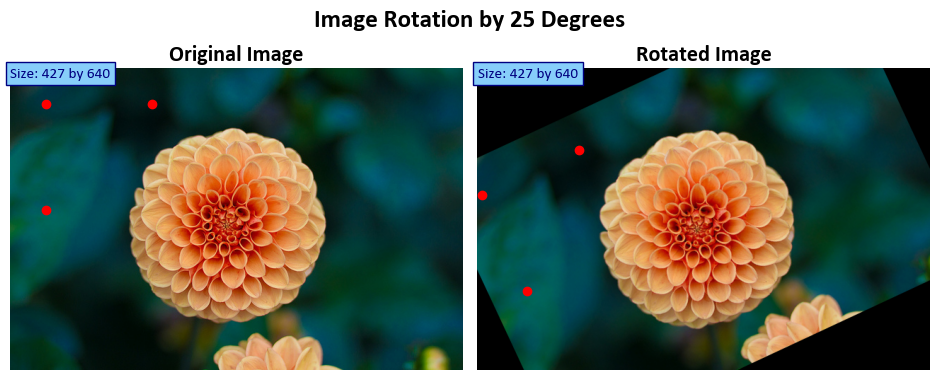

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Load the sample image
Img = load_sample_image('flower.jpg')

# Rotate the image by 25 degrees
rows, cols, _ = Img.shape
angle = 25  # Specify the rotation angle
scale = 1.0  # Scale factor (1.0 maintains the original size)
rotation_center = (cols // 2, rows // 2)  # Center of the image
print('rotation_center:')
print(rotation_center)

# Get the rotation matrix using cv2.getRotationMatrix2D
M = cv2.getRotationMatrix2D(rotation_center, angle, scale)
print('Affine Transformation Matrix (M) =', M)

# Apply the affine transformation to the image using warpAffine
Out = cv2.warpAffine(Img, M, (cols, rows))  # Transformed image

# Display the original and rotated images
fig, ax = ImShow([Img, Out],
                 ['Original Image', 'Rotated Image'],
                 title=f'Image Rotation by {angle} Degrees')

# Define the source points (original triangle)
src_pts = np.float32([[50, 50],
                      [200, 50],
                      [50, 200]])

# Define the destination points (how the triangle should be transformed)
dst_pts = Transformation(M, src_pts)

# Mark the source and destination points on the images
_ = ax[0].scatter(src_pts[:, 0], src_pts[:, 1], color='red')  # Mark source points on the original image
_ = ax[1].scatter(dst_pts[:, 0], dst_pts[:, 1], color='red')  # Mark destination points on the transformed image

# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

Based on the provided values of $\theta = 25$ (in degrees) and $\text{scale} = 1$, the resulting 2D rotation matrix $M$ can be calculated as follows:

\begin{equation}
\begin{bmatrix}
\alpha & \beta & (1 - \alpha) \cdot \text{center.x} - \beta \cdot \text{center.y} \\
- \beta & \alpha & \beta \cdot \text{center.x} + (1 - \alpha) \cdot \text{center.y}
\end{bmatrix}
\end{equation}

Where:

- $\alpha = \text{scale} \cdot \cos(\theta)$
- $\beta = \text{scale} \cdot \sin(\theta)$

Given that $\theta = 25$ degrees and $\text{scale} = 1$, you can calculate $\alpha$ and $\beta$ as follows:

\begin{equation}
\alpha = 1 \cdot \cos(25^\circ) \approx 0.90630779
\end{equation}

\begin{equation}
\beta = 1 \cdot \sin(25^\circ) \approx 0.42261826
\end{equation}

Now, you can calculate the elements of the rotation matrix $M$ using these values and the center point $(320, 213)$:

\begin{equation}
M = \begin{bmatrix}
0.90630779 & 0.42261826 & (1 - 0.90630779) \cdot 320 - 0.42261826 \cdot 213 \\
-0.42261826 & 0.90630779 & 0.42261826 \cdot 320 + (1 - 0.90630779) \cdot 213
\end{bmatrix}
\end{equation}

The resulting matrix $M$ will be:

\begin{equation}
M = \begin{bmatrix}
0.90630779 & 0.42261826 & -60.0361816 \\
-0.42261826 & 0.90630779 & 155.19428512
\end{bmatrix}
\end{equation}

This is the 2D rotation matrix $M$ corresponding to a rotation angle of 25 degrees and a scale factor of 1.

***

In this code example, we perform the following task(s):

This code snippet demonstrates image rotation using OpenCV. Here's a breakdown of each part:

1. `M = cv2.getRotationMatrix2D(rotation_center, angle, scale)`: This line calculates the rotation matrix for an affine transformation. It uses the `cv2.getRotationMatrix2D` function, which takes three arguments:
   - `rotation_center`: This specifies the center of rotation, typically a tuple of (x, y) coordinates. The rotation will occur around this point.
   - `angle`: This is the rotation angle in degrees. Positive angles indicate clockwise rotation.
   - `scale`: This argument allows for scaling the image during rotation. In most cases, it's set to 1 for no scaling.

2. `print('Affine Transformation Matrix (M) =', M)`: This line prints the calculated affine transformation matrix `M` to the console. The matrix represents the rotation transformation.

3. `Out = cv2.warpAffine(Img, M, (cols, rows))`: This code applies the calculated affine transformation matrix `M` to the input image `Img`. It uses the `cv2.warpAffine` function to perform the rotation. The result is stored in the variable `Out`, which represents the rotated image.

## Resizing Images with OpenCV

The `resize` function in OpenCV is a versatile tool for adjusting the size of images, whether making them smaller or larger. It offers several options for defining the output size or using scaling factors to control the resizing process, providing the flexibility needed for various image manipulation tasks {cite:p}`opencv_library, OpenCVDocumentation`.

**Key Concepts:**

The `resize` function is essential for handling image dimensions. Here's a breakdown of its capabilities:

1. **Resizing an Image:**
   The primary purpose of `resize` is to change the size of an image. This can involve reducing or increasing the image's dimensions. The function allows explicit size specification or resizing based on scaling factors (`fx` and `fy`). Importantly, the initial type or size of the output image (`dst`) is not used. Instead, it's determined based on the source image (`src`), the desired output size (`dsize`), and the specified scaling factors.

2. **Explicit Output Size:**
   If you want to resize `src` to fit a pre-created destination image `dst`, you can achieve this by calling the function as follows:
   ```python
   resize(src, dst, dst.size(), 0, 0, interpolation)
   ```
   Here, `dsize` is set to match the size of `dst`, and the scaling factors `fx` and `fy` are automatically computed based on that.

3. **Using Scaling Factors:**
   You can also use scaling factors to control the resizing process. For instance, to decrease the size of the image by a factor of 2 in both the horizontal and vertical directions (decimation), you can use the following approach:
   ```python
   resize(src, dst, Size(), 0.5, 0.5, interpolation)
   ```
   Here, `fx` and `fy` are explicitly specified, and the function calculates the destination image size based on these factors.

4. **Selecting Interpolation:**
   When shrinking an image, the `INTER_AREA` interpolation method is recommended for the best results in terms of image quality. On the other hand, when enlarging an image, using `INTER_CUBIC` (higher quality, but slower) or `INTER_LINEAR` (faster but still acceptable quality) interpolation methods is generally recommended.

**Function Parameters:**

- `src`: The input image to be resized.
- `dst`: The output image. Its size can be explicitly set using `dsize`, or it can be determined automatically based on `src.size()`, `fx`, and `fy`. The type of `dst` matches the type of `src`.
- `dsize`: The desired output image size. If set to zero (None in Python), the function calculates it as:
  ```
  dsize = Size(round(fx * src.cols), round(fy * src.rows))
  ```
  Either `dsize` or both `fx` and `fy` must be non-zero.
- `fx`: The scaling factor along the horizontal axis (width). If `fx` is 0, it's computed as `(double)dsize.width / src.cols`.
- `fy`: The scaling factor along the vertical axis (height). If `fy` is 0, it's computed as `(double)dsize.height / src.rows`.
- `interpolation`: The interpolation method used during the resizing operation (e.g., `INTER_NEAREST`, `INTER_LINEAR`, `INTER_CUBIC`, `INTER_LANCZOS4`).

The `resize` function allows you to resize images while maintaining control over the output size and selecting appropriate interpolation methods to achieve the desired quality.

**Syntax:**

```
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
```

Here's what each parameter does:

1. `src`: The input image that you want to resize. It should be a NumPy array (image) in most cases.

2. `dsize`: The desired size (width and height) of the output image. It's specified as a tuple (width, height). If you provide this parameter, the `fx` and `fy` parameters (scaling factors) are ignored.

3. `dst` (optional): The output image where the resized image will be stored. If not provided, a new image will be created to store the result.

4. `fx` (optional): The scale factor along the horizontal axis (width) by which you want to resize the image. If you provide `fx`, the `dsize` parameter is ignored on that axis.

5. `fy` (optional): The scale factor along the vertical axis (height) by which you want to resize the image. If you provide `fy`, the `dsize` parameter is ignored on that axis.

6. `interpolation` (optional): The interpolation method to be used during the resizing operation. Interpolation determines how pixel values are computed for the output image based on the input image. Common [interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation) methods include:

   - `cv2.INTER_NEAREST`: Nearest-neighbor interpolation (fast but may produce blocky results).
   - `cv2.INTER_LINEAR`: Bilinear interpolation (good for most general-purpose resizing).
   - `cv2.INTER_CUBIC`: Bicubic interpolation (better quality, but slower).
   - `cv2.INTER_LANCZOS4`: Lanczos interpolation (high-quality but slower).

The `cv2.resize()` function resizes the input image based on the specified size or scaling factors and the chosen interpolation method. The function returns the resized image, and if you provided the `dst` parameter, the resized image is stored in the `dst` array; otherwise, a new image is created and returned. The `dst` parameter allows you to reuse an existing image array for efficiency.

<font color='Blue'><b>Example:</b></font> In this example, we'll explore an image processing task that involves resizing an image using cubic interpolation. Cubic interpolation is a method for resizing images while maintaining smooth transitions between pixels. We'll load a sample image, apply the resizing operation, and visualize both the original and resized images. Additionally, we'll add text annotations to display the sizes of the original and resized images for reference.

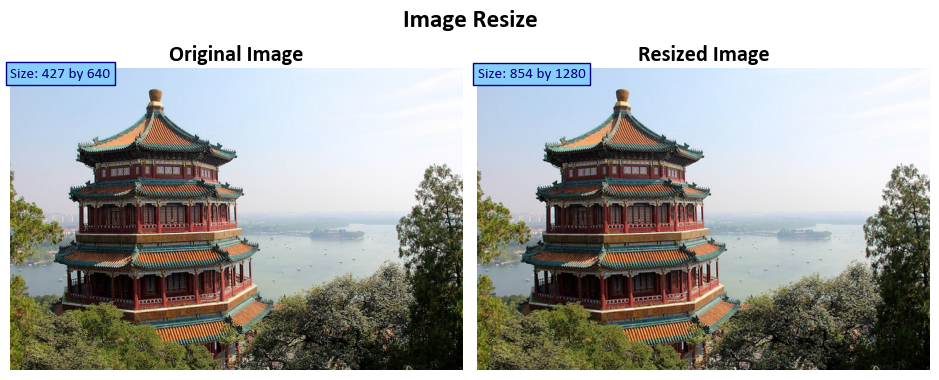

In [7]:
# Load the sample image 'china.jpg'
Img = load_sample_image('china.jpg')
                        
# Resize the original image using cubic interpolation
Out = cv2.resize(Img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Display the original and resized images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Resized Image'], title='Image Resize')

# Add text indicating the size of the original and resized images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

In this code example, we perform the following task(s):

`Out = cv2.resize(Img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)`: This line resizes an input image `Img` and stores the result in the variable `Out`. The `cv2.resize` function is used for this purpose, and it takes several arguments:

- `Img`: This is the input image that you want to resize.

- `None`: The second argument represents the output image size. In this case, it is set to `None`, which means the size of the output image will be determined automatically based on the scaling factors provided in the next two arguments.

- `fx=2` and `fy=2`: These arguments specify the scaling factors for resizing. `fx` is the scaling factor for the width, and `fy` is the scaling factor for the height. In this case, both factors are set to 2, which means the image will be scaled up by a factor of 2 in both dimensions, effectively doubling its size.

- `interpolation=cv2.INTER_CUBIC`: This argument defines the interpolation method used during the resizing process. `cv2.INTER_CUBIC` is used here, which corresponds to the bicubic interpolation method. Bicubic interpolation produces high-quality results when upscaling an image, resulting in a smoother and more detailed output.

## Warp Perspective (Optional Content)

The `cv2.warpPerspective()` function in the Python OpenCV library is a powerful tool used for performing perspective transformations on an input image. These transformations allow you to change the perspective view of an object within an image, simulating effects like changing the viewpoint or correcting for distortions caused by the camera's perspective. The primary purpose of this function is to apply a given 3x3 transformation matrix to the input image, resulting in a transformed output image {cite:p}`opencv_library, OpenCVDocumentation`.

**Perspective Transformation**

Perspective transformations are essential for various computer vision tasks, including image rectification, object recognition, and more. They involve manipulating the positions of points in an image, effectively warping the image based on a specified transformation matrix. This matrix, denoted as `M`,
\begin{equation}
M = \begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \\M_{31} & M_{32} & M_{33} \end{bmatrix}
\end{equation}

describes how the points in the source image (`src`) should be transformed to obtain their corresponding positions in the destination image (`dst`).

The transformation is defined by the following equation:

\begin{equation}
\texttt{dst} (x,y) = \texttt{src} \left ( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}} , \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right )
\end{equation}

When the flag `WARP_INVERSE_MAP` is set, the function uses the inverse of the transformation matrix for the calculation. Otherwise, the transformation is inverted using the `invert` function before being applied. The function does not operate in-place; it generates a new transformed image as the output.

**Parameters**

Here's a detailed explanation of the parameters used in the `cv2.warpPerspective()` function:

- `src`: This parameter represents the input image you want to transform using the perspective transformation. It should be a numpy array, representing the image you wish to warp.

- `M`: The `M` parameter is a 3x3 transformation matrix that defines the perspective transformation. This matrix describes how the points in the source image (`src`) should be transformed to obtain the corresponding points in the destination image (`dst`).

- `dsize`: The `dsize` parameter specifies the size of the output image (`dst`). It is a tuple containing the width and height of the destination image. The transformed input image (`src`) will be resized to this size.

- `dst` (optional): The `dst` parameter serves as the output image where the result of the perspective transformation will be stored. If this parameter is not provided, a new image will be created to hold the transformed result.

- `flags` (optional): The `flags` parameter provides additional transformation options. It can be a combination of transformation flags, but it is often set to `cv2.INTER_LINEAR` for bilinear interpolation, which provides a good trade-off between speed and quality.

- `borderMode` (optional): The `borderMode` parameter specifies how the border of the output image (`dst`) should be filled. It can be set to different border modes, such as `cv2.BORDER_CONSTANT` or `cv2.BORDER_REPLICATE`, depending on the desired behavior.

- `borderValue` (optional): The `borderValue` parameter is used to specify the value used for padding if the `borderMode` is set to `cv2.BORDER_CONSTANT`.

**Function Signature**

Here's the structure of the function signature:

```
cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
```

**Usage and Importance**

The `cv2.warpPerspective()` function is a fundamental component in many image processing pipelines. It enables handling perspective effects, correcting image distortions, and preparing images for further analysis or visualization. By understanding and utilizing perspective transformations, you can significantly enhance the capabilities of your computer vision applications.

For more detailed information and examples of using `warpPerspective`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#cv2.warpPerspective) and the [function description](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87). This function is essential for tasks that require precise geometric adjustments in images, making it a valuable tool in various computer vision scenarios.

<font color='Blue'><b>Example</b></font>: In this example, we explore perspective transformation, a crucial concept in image processing. We define source and destination points to describe how we want to alter the image's perspective. Using these points, we calculate a transformation matrix (M). Then, we apply this matrix to the input image, transforming its perspective. We visualize both the original and transformed images, including annotations for size reference and marked points to show the transformation's effect.

M = [[ 1.52835807e+00  1.43283569e-01 -8.50149178e+01]
 [ 5.25237016e-02  1.57571105e+00 -9.71688479e+01]
 [ 3.13555899e-04  6.58838004e-04  1.00000000e+00]]


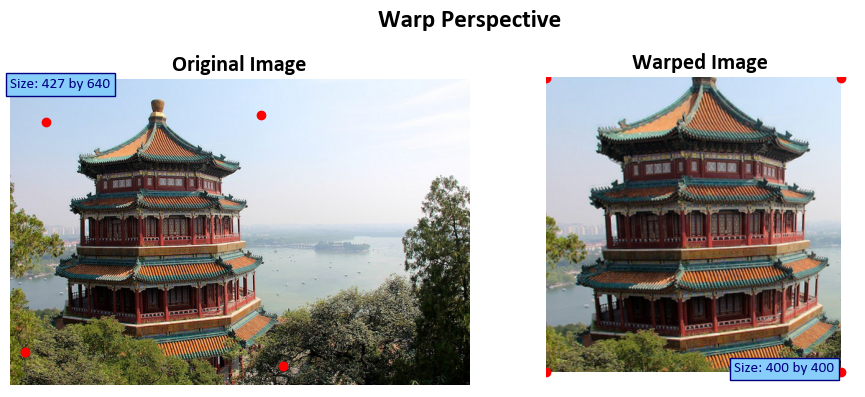

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the source and destination points for perspective transformation
src_pts = np.float32([[50, 60], [350, 50], [20, 380], [380, 400]])  # Source points
dst_pts = np.float32([[0, 0], [400, 0], [0, 400], [400, 400]])  # Destination points

# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Apply the perspective transformation to the input image
Out = cv2.warpPerspective(Img, M, dsize = (400, 400))
print('M =', M)

# Display the original and transformed images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Warped Image'], title='Warp Perspective')

# Add text to indicate the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=int(0.6 * Img.shape[0]), y=Out.shape[1], s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

# Mark the source and destination points on the images
_ = ax[0].scatter(src_pts[:, 0], src_pts[:, 1], color='red')  # Mark source points on the original image
_ = ax[1].scatter(dst_pts[:, 0], dst_pts[:, 1], color='red')  # Mark destination points on the transformed image

In this code example, we perform the following task(s):

1. `src_pts` and `dst_pts`: These are two sets of points used to define the source and destination points for the perspective transformation. In this context:
   - `src_pts` represents the coordinates of four points in the source image that define the region you want to transform. These points are specified as a NumPy array of shape (4, 2), where each row represents the (x, y) coordinates of a point.
   - `dst_pts` represents the corresponding destination points in the transformed image. Like `src_pts`, it's also a NumPy array of shape (4, 2), where each row specifies the (x, y) coordinates of a point in the destination image. These points define where the source region will be mapped to in the transformed image.

2. `cv2.getPerspectiveTransform(src_pts, dst_pts)`: This line calculates the perspective transformation matrix `M` using the source and destination points. The `cv2.getPerspectiveTransform` function takes the source and destination points as arguments and returns the transformation matrix. This matrix describes how points in the source image are mapped to points in the destination image, considering perspective distortion.

3. `Out = cv2.warpPerspective(Img, M, dsize=(400, 400))`: This code applies the calculated perspective transformation to the input image `Img`. The `cv2.warpPerspective` function takes three arguments:
   - `Img`: This is the input image that you want to transform.
   - `M`: This is the perspective transformation matrix obtained earlier using source and destination points.
   - `dsize`: This argument specifies the size of the output image after the transformation. In this case, it's set to (400, 400), meaning that the resulting image will have dimensions of 400x400 pixels.